In [2]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

np.random.seed(0)

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


def sigmoid(z):
    
    return 1 / (1+np.exp(-z))

In [3]:
class SimpleClassificationTest:
    
    # constructor
    def __init__(self, xdata, tdata, learning_rate, iteration_count, cross_entropy=True):
            
        # 가중치 W 형상을 자동으로 구하기 위해 입력데이터가 vector 인지,
        # 아니면 matrix 인지 체크 후, 
        # self.xdata 는 무조건 matrix 로 만들어 주면 코드 일관성이 있음
        
        if xdata.ndim == 1:    # vector 차원으로 들어오면 행렬로 바꿔줌
            self.xdata = xdata.reshape(len(xdata), 1)
            self.tdata = xdata.reshape(len(tdata), 1)
            
        elif xdata.ndim == 2:  # matrix 행렬로 들어옴
            self.xdata = xdata
            self.tdata = tdata
        
        self.learning_rate = learning_rate
        self.iteration_count = iteration_count
        
        self.W = np.random.rand(self.xdata.shape[1], 1) 
        self.b = np.random.rand(1)
        
        self.cross_entropy = cross_entropy
        
        self.loss_val_list = []
        # 빈 손실함수 리스트를 생성, 리턴값을 대기
        
        print("SimpleClassificationTest Object is created")
        
        if cross_entropy == True:
            print('loss function is set to cross entropy')
        else:
            print('loss function is set to MSE')
        
        
    # obtain current W and current b
    def getW_b(self):
        
        return self.W, self.b
    
    
    # loss function
    def loss_func(self):
    
        z = np.dot(self.xdata, self.W) + self.b
        
        y = sigmoid(z)
    
        if self.cross_entropy == True:
            
            delta = 1e-7    # log 무한대 발산 방지
            
            # cross-entropy 
            return  -np.sum( self.tdata*np.log(y + delta) + (1-self.tdata)*np.log((1 - y)+delta ) ) 
        
        else:  # loss function == MSE
            
            return ( np.sum((self.tdata-y)**2) ) / ( len(self.xdata) )
            
    
    # display current error value
    def error_val(self):
        
        z = np.dot(self.xdata, self.W) + self.b
        
        y = sigmoid(z)
    
        if self.cross_entropy == True:
            
            delta = 1e-7    # log 무한대 발산 방지
                
            # cross-entropy 
            return  -np.sum( self.tdata*np.log(y + delta) + (1-self.tdata)*np.log((1 - y)+delta ) ) 
        
        else:  # loss function == MSE
            
            return ( np.sum((self.tdata-y)**2) ) / ( len(self.xdata) )
    
    
    # predict method
    # 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
    # 입력변수 x : numpy type
    def predict(self, test_data):
    
        z = np.dot(test_data, self.W) + self.b
        y = sigmoid(z)
    
        if y >= 0.5:
            result = 1  # True
        else:
            result = 0  # False
    
        return y, result
    
    
    def display_loss_val(self):
        
        if len(self.loss_val_list) == 0:
            print('loss_val is currently empty')
            return
        
        plt.title('Loss Value Trend')
        plt.ylabel('loss value')
        plt.grid()
        
        plt.plot(self.loss_val_list)
        plt.show()
        
    # train method
    def train(self):
    
        f = lambda x : self.loss_func()

        print("Initial error value = ", self.error_val() )

        start_time = datetime.now()
        
        for step in  range(self.iteration_count):  
    
            self.W -= self.learning_rate * numerical_derivative(f, self.W)
    
            self.b -= self.learning_rate * numerical_derivative(f, self.b)
    
            if (step % (int)(0.05*self.iteration_count) == 0):
            
                current_loss_val = self.error_val()                
                print("step = ", step, "error value = ", current_loss_val )                
                self.loss_val_list.append(current_loss_val)
                
                
        end_time = datetime.now()
        
        print("")
        print("Elapsed Time => ", end_time - start_time)

In [4]:
# 입력데이터 / 정답데이터 세팅

x_data = np.array( [ [2, 4], [4, 11], [6, 6], [8, 5], [10, 7], [12, 16], [14, 8], [16, 3], [18, 7] ] )
t_data = np.array( [0, 0, 0, 0, 1, 1, 1, 1, 1] ).reshape(9, 1)

print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)

x_data.shape =  (9, 2) , t_data.shape =  (9, 1)


### learning_rate = 1e-2,  반복횟수 100,000번 수행하는 obj1, cross-entropy version

In [5]:
obj1 = SimpleClassificationTest(x_data, t_data, 1e-2, 100001)

obj1.train()

SimpleClassificationTest Object is created
loss function is set to cross entropy
Initial error value =  31.987989823677083
step =  0 error value =  21.153788725085356
step =  5000 error value =  0.6053721152076603
step =  10000 error value =  0.40460866102297394
step =  15000 error value =  0.3071718920969423
step =  20000 error value =  0.24747210708062592
step =  25000 error value =  0.20700760661345197
step =  30000 error value =  0.17778892255032153
step =  35000 error value =  0.15571997276750377
step =  40000 error value =  0.1384756571832395
step =  45000 error value =  0.12463783640271144
step =  50000 error value =  0.11329289089055232
step =  55000 error value =  0.10382607297876789
step =  60000 error value =  0.0958087786727904
step =  65000 error value =  0.08893319980169334
step =  70000 error value =  0.08297266025182302
step =  75000 error value =  0.077756594039045
step =  80000 error value =  0.07315423152396949
step =  85000 error value =  0.06906365588118415
step = 

In [6]:
test_data = np.array([3, 17])

(real_val, logical_val) = obj1.predict(test_data)

print(real_val, logical_val)

[0.15441576] 0


In [7]:
test_data = np.array([5, 8])

(real_val, logical_val) = obj1.predict(test_data)

print(real_val, logical_val)

[0.0007137] 0


In [8]:
test_data = np.array([7, 21])

(real_val, logical_val) = obj1.predict(test_data)

print(real_val, logical_val)

[0.99999641] 1


In [9]:
test_data = np.array([12, 0])

(real_val, logical_val) = obj1.predict(test_data)

print(real_val, logical_val)

[0.59986773] 1


In [10]:
(W, b) = obj1.getW_b()

print('W = ', W, ', b = ', b)

W =  [[2.40840257]
 [1.15119589]] , b =  [-28.49591689]


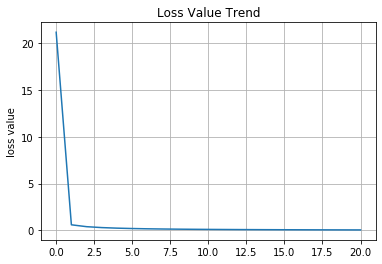

In [11]:
obj1.display_loss_val()

### learning_rate = 1e-2,  반복횟수 100,000번 수행하는 obj1, MSE version

In [12]:
obj2 = SimpleClassificationTest(x_data, t_data, 1e-2, 100001, False)

obj2.train()

SimpleClassificationTest Object is created
loss function is set to MSE
Initial error value =  0.4369328787030761
step =  0 error value =  0.43692012599142954
step =  5000 error value =  0.09700066123308711
step =  10000 error value =  0.06359721020524348
step =  15000 error value =  0.049704085633447
step =  20000 error value =  0.04206309215063417
step =  25000 error value =  0.037143733382996105
step =  30000 error value =  0.03364438012696055
step =  35000 error value =  0.030979977967089692
step =  40000 error value =  0.028850187469966055
step =  45000 error value =  0.027085256551655203
step =  50000 error value =  0.02558199298560566
step =  55000 error value =  0.024274021647344185
step =  60000 error value =  0.023116710355965176
step =  65000 error value =  0.022078965384584797
step =  70000 error value =  0.021138486432206626
step =  75000 error value =  0.020278874839471845
step =  80000 error value =  0.019487792677341714
step =  85000 error value =  0.018755750869978827
s

In [13]:
test_data = np.array([3, 17])

(real_val, logical_val) = obj2.predict(test_data)

print(real_val, logical_val)

[0.08045049] 0


In [14]:
test_data = np.array([5, 8])

(real_val, logical_val) = obj2.predict(test_data)

print(real_val, logical_val)

[0.06047055] 0


In [15]:
test_data = np.array([7, 21])

(real_val, logical_val) = obj2.predict(test_data)

print(real_val, logical_val)

[0.83671123] 1


In [15]:
test_data = np.array([12, 0])

(real_val, logical_val) = obj2.predict(test_data)

print(real_val, logical_val)

[0.76600365] 1


In [16]:
(W, b) = obj2.getW_b()

print('W = ', W, ', b = ', b)

W =  [[0.8046337 ]
 [0.21291647]] , b =  [-8.46972302]


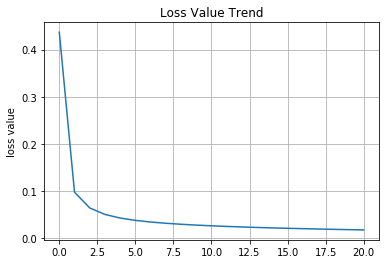

In [18]:
obj2.display_loss_val()